# Santander Customer Satisfaction
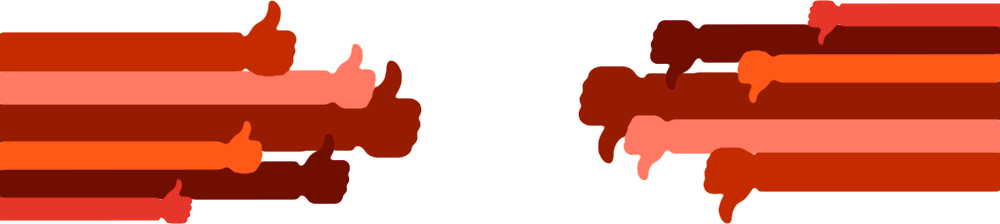

# 1. 파일 불러오기  & 기본 환경설정

In [ ]:
import numpy as np # 넘파이
import pandas as pd # 판다스
import sklearn #사이킷런
import matplotlib.pyplot as plt #그래프1
import seaborn as sns  # 그래프2
from sklearn.ensemble import RandomForestClassifier # 모델1
from sklearn.linear_model import LogisticRegression  # 모델2
from sklearn.metrics import roc_auc_score #성능평가
from sklearn.model_selection import train_test_split, cross_validate #데이터분리, 교차검증
from sklearn.pipeline import Pipeline #파이프라인
from sklearn.preprocessing import StandardScaler #스케일링

In [ ]:
!pip install feature-engine # 특성 추출 모듈 

     |████████████████████████████████| 205 kB 6.8 MB/s 
     |████████████████████████████████| 9.8 MB 41.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DATA/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DATA/Santander Customer Satisfaction_test.csv') 

# 2. 데이터 훑어보기
- 76020개의 자료와 370개의 특성(TARGET 제외)
- 컬럼명으로는 알 수 없는 특성들(은행자료로 암호화)

In [ ]:
train_df.shape, test_df.shape

((76020, 370), (75818, 369))

In [ ]:
train_df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [ ]:
train_df.isnull().sum().sum()

In [ ]:
print(train_df['TARGET'].value_counts())

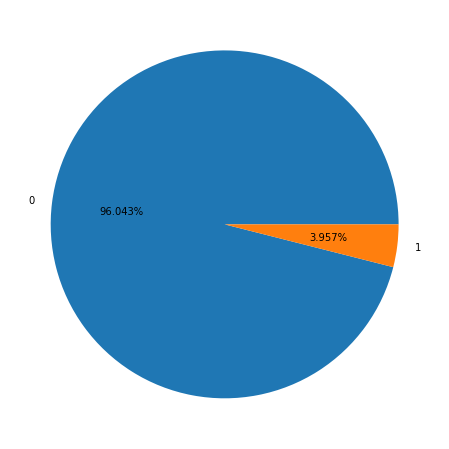

Number of Positive data points are: 3008  (3.957%)
Number of Negative data points are: 73012 (96.043%)


In [ ]:
zero= train_df['TARGET'].value_counts()[0]
one= train_df['TARGET'].value_counts()[1]
my_labels=[0,1]
plt.rcParams["figure.figsize"] = (8,8)

plt.pie([zero,one], labels= my_labels, autopct='%1.3f%%')
plt.show()

print("Number of Positive data points are: {}  ({:.3f}{})".format(one, one/(one+zero)*100, "%"))
print("Number of Negative data points are: {} ({:.3f}{})".format(zero, zero/(one+zero)*100, "%"))

# 3. 베이스라인 모델

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')

In [ ]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
train['var3'].value_counts(ascending=False)

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [ ]:
train['var3'].replace(-999999,2, inplace=True) #-99999를 제일 많고 낮은값으로 교체
train.drop('ID',axis=1 , inplace=True) #만족 불만족을 따지는거라 고객이름은 불필요하기에 필요없는 ID컬럼 삭제

In [ ]:
X_features = train.iloc[:, :-1] #target 값을 제외한 행
y_labels = train.iloc[:, -1] #target값

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0) #train을 X_feature 와 y_labels 8:2로 다시분류, 동일한 결과를위해 random_state 지정
train_cnt = y_train.count() #트레인값만 카운트
test_cnt = y_test.count() #테스트값만 카운트
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape)) #학습,테스트 shape

#잘나뉘었나 확인
print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt) #만족,불만족 비율표시
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt) 

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [ ]:
#XGBoost #이전 gridcv로 나온 최적 파라미터{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weigth': 1} 였으니 이것으로 바꿔줌
#과적합방지를위해 n_estimators는 1000으로 증가시키고, 학습스탭크기를 0.02로 작게, L1 규제(Lasso)를 0.03으로 추가함
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8456

In [ ]:
#gridcv를 이용한 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}를 적용해서 다시
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, #eval_set=evals는 학습은 학습 데이터로 하되, 예측 오류값 평가는 eval_set로 지정된 검증 세트로 평가하는 방식, 학습 데이터로만 예측 오류값을 줄이게 되면 오버 피팅 우려가 높아서 별도의 검증 세트(evals) 를 지정하여 수행
                verbose=True) #verbose=True 수행중 발생하는정보를 출력해줌

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8442

# 3. 탐색적 데이터 분석 (EDA)

### 1) 특성 유추

- 1)  var15는 연령일 가능성이 높다
  - 5~105 사이의 고유한 값을 가진다.
  - 그렇다면 주고객은 30세 미만이고 23세 미만 고객은 결코 불만족을 누르지 않는다.
  - 23세 미만 여부에 따라 새로운 특성을 넣을 수 있다. 
- 2)  num_var4는 고객이 은행에서 가지고 있는 은행 상품 수일 가능성이 높다.
  - 불만족한 고객은 은행 상품을 구매하지 않았고 2개 이상 상품을 구매한 고객은 거의 모두 만족을 골랐다. 
  - 'num_var4'이  6 이상인 고객은 모두 만족했다

In [ ]:
np.sort(pd.unique(train_df['var15'])) # 5~105 사이의 고유한 값을 가진다.

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 104, 105])

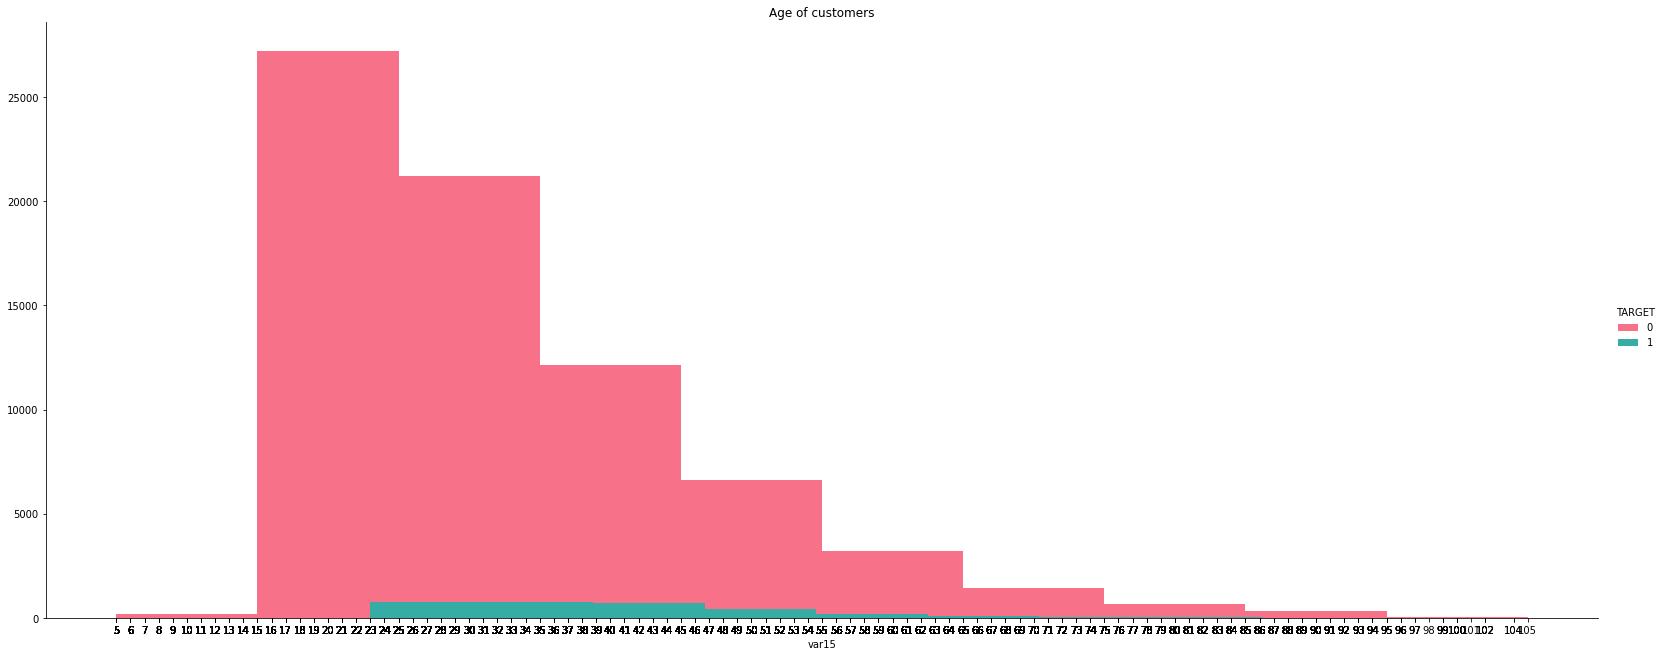

In [ ]:
#1) var15
counts, bins = np.histogram(train_df)
g = sns.FacetGrid(train_df, hue='TARGET', palette="husl", height=9, aspect=2.5).map(plt.hist, 'var15').add_legend()
g.set(xticks=train_df.var15)

plt.title('Age of customers')
plt.show()

In [ ]:
for age in [79,80]:
  cnt= 0
  for i in train_df['var15']:
    if (i > age) and (train_df['TARGET'][i]==1):
      cnt +=1
  print("Number of unsatisfied customers of more than {} age: {}".format(age, cnt))

Number of unsatisfied customers of more than 79 age: 57
Number of unsatisfied customers of more than 80 age: 0


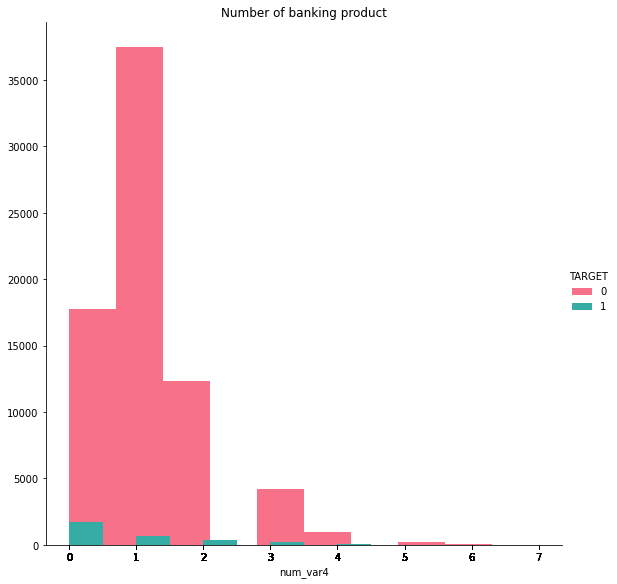

In [ ]:
g = sns.FacetGrid(train_df, hue='TARGET', palette="husl", height=8, aspect=1).map(plt.hist, 'num_var4').add_legend()
g.set(xticks=train_df.num_var4)

plt.title('Number of banking product')
plt.show()

In [ ]:
train_df['num_var4'].value_counts()

1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

In [ ]:
train_df.loc[train_df['TARGET']==1]['num_var4'].value_counts()

0    1737
1     692
2     333
3     182
4      58
5       6
Name: num_var4, dtype: int64

## 2) 특성 중요도 

Text(0.5, 0, 'Random Forest Feature Importance')

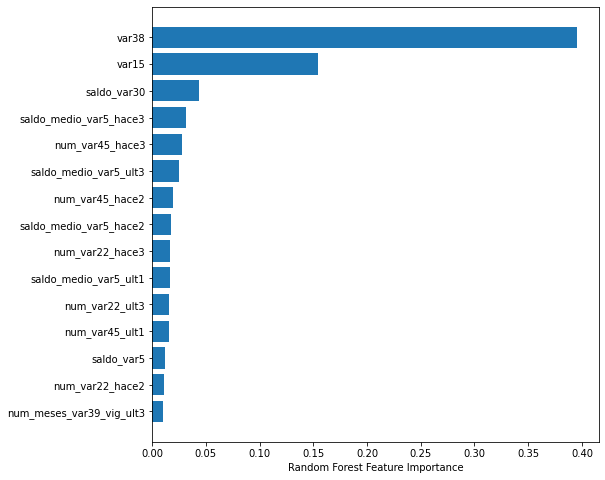

In [ ]:
# decissiontree for feature importance:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# get importance
importance_dt = model.feature_importances_

# before feat engg
sorted_idx = importance_dt.argsort()[-15:]
plt.barh(X_train.columns[sorted_idx], importance_dt[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

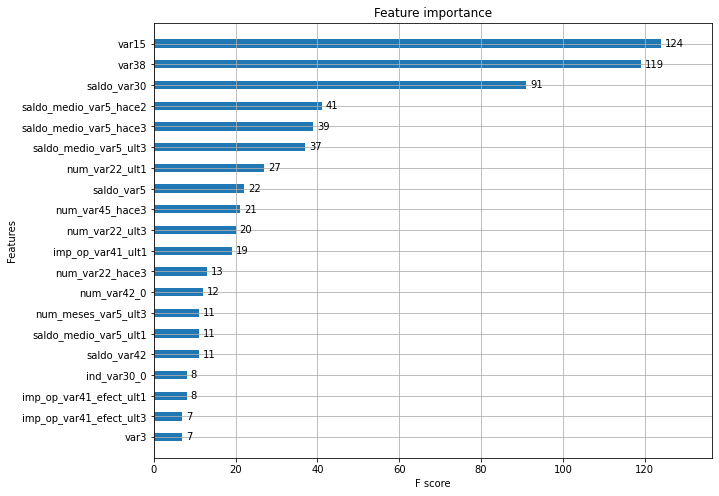

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(clf_xgb, ax=ax, max_num_features=20, height=0.4)
plt.show()

In [ ]:
y_train= train_df['TARGET']
X_train= train_df.drop('TARGET', axis=1)
X_test = test_df

In [ ]:
print(train_df['TARGET'].value_counts())
unsatisfied_cnt = train_df[train_df['TARGET'] == 1].TARGET.count()
total_cnt = train_df.TARGET.count()
print('비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

# 4. 특성 골라내기(Feature preprocessing)

## 일정한 데이터로된 컬럼 거르기
- 38개

In [ ]:
# with tol=1 we tell the transformer to remove constant features
constant = DropConstantFeatures(tol=1)

# finds the constant features on the train set
constant.fit(X_train)

DropConstantFeatures()

In [ ]:
len(constant.features_to_drop_)

38

In [ ]:
print('Number of variables before removing constant: ', X_train.shape[1])

Number of variables before removing constant:  369


In [ ]:
# remove constant features - transform method
X_train = constant.transform(X_train)
X_test = constant.transform(X_test)

print('Number of variables after removing constant: ', X_train.shape[1])

Number of variables after removing constant:  335


In [ ]:
X_train.shape, X_test.shape

(76020, 335)

## 거의 일정한 데이터 삭제 
- 139개

In [ ]:
quasi_constant = DropConstantFeatures(tol=0.9995)
# find quasi-constant features in the train set
quasi_constant.fit(X_train)

DropConstantFeatures(tol=0.9995)

In [ ]:
print('Number of variables before removing quasi-constant: ', X_train.shape[1])

Number of variables before removing quasi-constant:  331


In [ ]:
# remove quasi-constant features - transform method
X_train = quasi_constant.transform(X_train)
X_test = quasi_constant.transform(X_test)

print('Number of variables after removing quasi-constant: ', X_train.shape[1])

Number of variables after removing quasi-constant:  242


In [ ]:
X_train.shape, X_test.shape

((76020, 242), (75818, 242))

## 중복값 삭제

In [ ]:
duplicates = DropDuplicateFeatures()

# find duplicated features in the train set
duplicates.fit(X_train)

DropDuplicateFeatures()

In [ ]:
duplicates.duplicated_feature_sets_ #중복값 특성들 나열

[{'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var32', 'ind_var32_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_var39', 'ind_var40'},
 {'num_var26', 'num_var26_0'},
 {'num_var25', 'num_var25_0'},
 {'num_var32', 'num_var32_0'},
 {'num_var37', 'num_var37_0'},
 {'num_var39', 'num_var40'}]

In [ ]:
X_train['ind_var26'].equals(X_train['ind_var26_0']) # 100프로 중복 

True

In [ ]:
duplicates.features_to_drop_

{'ind_var25',
 'ind_var26',
 'ind_var32',
 'ind_var37',
 'ind_var39',
 'num_var25',
 'num_var26',
 'num_var32',
 'num_var37',
 'num_var39'}

In [ ]:
print('Number of variables before removing duplicates: ', X_train.shape[1])

Number of variables before removing duplicates:  242


In [ ]:
X_train = duplicates.transform(X_train)
X_test = duplicates.transform(X_test)

print('Number of variables after removing duplicates: ', X_train.shape[1])

Number of variables after removing duplicates:  232


In [ ]:
X_train.shape, X_test.shape

((76020, 232), (75818, 232))

## 상관관계 
- 103개

In [ ]:
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.98)

# find correlated variables in the train set
correlated.fit(X_train)

DropCorrelatedFeatures(threshold=0.98)

In [ ]:
correlated.correlated_feature_sets_

[{'imp_op_var39_efect_ult1', 'imp_op_var41_efect_ult1'},
 {'imp_op_var39_efect_ult3', 'imp_op_var41_efect_ult3'},
 {'imp_op_var39_ult1', 'imp_op_var41_ult1'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var40', 'num_var1', 'num_var40'},
 {'ind_var5', 'num_var5'},
 {'ind_var8_0', 'num_var8_0'},
 {'ind_var8', 'num_var8'},
 {'ind_var12', 'num_var12'},
 {'ind_var13', 'ind_var13_0'},
 {'ind_var13_corto',
  'ind_var13_corto_0',
  'num_var13_corto',
  'num_var13_corto_0'},
 {'ind_var13_largo', 'ind_var13_largo_0'},
 {'ind_var14', 'num_var14'},
 {'ind_var20_0', 'num_var20_0'},
 {'ind_var20', 'num_var20'},
 {'ind_var24_0', 'num_var24_0'},
 {'ind_var24', 'num_var24'},
 {'ind_var39_0', 'ind_var41_0'},
 {'ind_var44_0', 'num_var44_0'},
 {'ind_var44', 'num_var44'},
 {'num_var35', 'num_var4'},
 {'num_op_var39_hace2', 'num_op_var41_hace2'},
 {'num_op_var39_hace3', 'num_op_var41_hace3'},
 {'num_op_var39_ult1', 'num_op_var41_ult1'},
 {'num_op_var39_ult3', 'num_op_var4

In [ ]:
corrmat = X_train[[
    'imp_op_var39_comer_ult1',
    'imp_op_var39_comer_ult3',
    'imp_op_var41_comer_ult1',
    'imp_op_var41_comer_ult3']].corr(method='pearson')

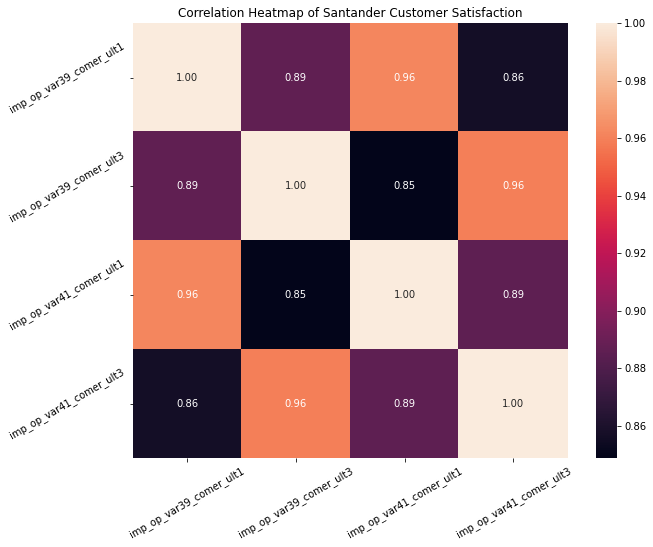

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap of Santander Customer Satisfaction')
a = sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    # 0.8 이상의 상관성을 알 수 있다.

In [ ]:
len(correlated.features_to_drop_)

49

In [ ]:
print('Number of variables before removing correlated: ', X_train.shape[1])

Number of variables before removing correlated:  183


In [ ]:
# remove correlated variables
X_train = correlated.transform(X_train)
X_test = correlated.transform(X_test)

print('Number of variables after removing correlated: ', X_train.shape[1])

In [ ]:
X_train.shape, X_test.shape

((76020, 183), (75818, 183))

## 모듈을 이용해 한번더 상관성 파악 후 drop
- 17개

In [ ]:
X_train.shape, X_test.shape

In [ ]:
smart_corr = SmartCorrelatedSelection(
    variables=None, # examines all variables
    method="pearson", # the correlation method
    threshold=0.98, # the correlation coefficient threshold
    missing_values="ignore",
    selection_method="model_performance", # how to select the features
    estimator=RandomForestClassifier(n_estimators=10, random_state=1), # the model from which to derive the importance
)

# find correlated features and select the best from each group

# the method builds a random forest using each single feature from the correlated feature group
# and retains the feature from the group with the best performance

smart_corr.fit(X_train, X_test)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=1),
                         selection_method='model_performance', threshold=0.98)

In [ ]:
# the correlated feature groups

smart_corr.correlated_feature_sets_

[]

In [ ]:
# lets examine the performace of a random forest based on
# each feature from the fifth group from above, to understand
# what the transformer is doing

# select fifth group of correlated features
group = smart_corr.correlated_feature_sets_[4]

# build random forest with cross validation for
# each feature

for f in group:
    model = cross_validate(
        RandomForestClassifier(n_estimators=10, random_state=1),
        X_train[f].to_frame(),
        y_train,
        cv=3,
        return_estimator=False,
        scoring='roc_auc',
    )

    print(f, model["test_score"].mean())

IndexError: ignored

In [ ]:
# this variable will be dropped, and thus it is in the features_to_drop_ attribute
for i in group:
  print(i, i in smart_corr.features_to_drop_)

NameError: ignored

In [ ]:
print('Number of variables before removing correlated: ', X_train.shape[1])

Number of variables before removing correlated:  183


In [ ]:
# remove correlated variables
X_train = smart_corr.transform(X_train)
X_test = smart_corr.transform(X_test)
print('Number of variables after removing correlated: ', X_train.shape[1])

Number of variables after removing correlated:  183


In [ ]:
X_train.shape, X_test.shape

((76020, 183), (75818, 183))

In [ ]:
X_train1 = X_train
X_test1 = X_test

In [ ]:
X_train = X_train1
X_test = X_test1

## 1) 파이프라인으로 특성 고르기

In [ ]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.9995)), # 일정한 값인 특성들 drop
    ('duplicated', DropDuplicateFeatures()), # 중복값 drop
    ('correlation', SmartCorrelatedSelection( # 특성들 간의 상관성 높은 게 drop
        threshold=0.98,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])
# find features to remove

pipe.fit(X_train, y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.9995)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                                           random_state=1),
                                          selection_method='model_performance',
                                          threshold=0.98))])

In [ ]:
print('Number of original variables: ', X_train.shape[1]) # drop 전 컬럼 수 
print('Number of original variables: ', X_train.shape[1]) # drop 전 컬럼 수 

Number of original variables:  369


In [ ]:
# remove variables
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

print('Number of variables after selection: ', X_train.shape[1])

Number of variables after selection:  182


In [ ]:
X_test.shape, X_train.shape

((22806, 182), (53214, 182), (75818, 182))

## 2) 재귀적으로 기능 선택
- 이 방법은 모든 기능을 갖춘 모델을 구축하는 것으로 시작합니다.
- 그런 다음 모델에서 파생된 중요도에 따라 가장 중요한 것부터 가장 덜 중요한 것순으로 기능의 순위를 지정합니다.
- 그런 다음 가장 중요하지 않은 기능을 제거합니다.
- 새 모델을 학습하고 성능을 결정합니다.
- 성능 저하가 크면 기능을 유지하고 그렇지 않으면 제거합니다.
- 모든 기능이 검사될 때까지 3-5단계를 반복합니다.

In [ ]:
# let's remove constant, quasi-constant and duplicates to speed things up

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()),
])

# find features to remove
pipe.fit(X_train, y_train)

# remove variables

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
rfe = RecursiveFeatureElimination(
    estimator = RandomForestClassifier(n_estimators=10,, max_depth=3,colsample_bytree=0.5, min_child_weight=3), # the model
    scoring="roc_auc", # the metric to determine model performance
    cv=3, # the cross-validation fold
    threshold = 0.04, 
)

rfe.fit(X_train, y_train)

In [ ]:
rfe.feature_importances_

In [ ]:
# plot of feature importance, derived from the Random Forests
pd.Series(rfe.feature_importances_).plot.bar(figsize=(20,5))
plt.ylabel('Feature importance derived from the random forests')
plt.show()

In [ ]:
# the number of features that will be dropped
len(rfe.features_to_drop_)

In [ ]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

print('Number of variables after removing non important: ', X_train.shape[1])

## 기능 전처리

### 불변 특성 제거

In [ ]:
def remove_const_feature(train=train_df,  test=test_df, threshold=0):
    from sklearn.feature_selection import VarianceThreshold

    vt = VarianceThreshold(threshold=threshold)
    vt.fit(train_df)
    const_feat = [x for x in train_df.columns if (x !='TARGET') and (x not in train_df.columns[vt.get_support()])]

    print("Number of columns before: {} ".format(train_df.shape[1]))
    train_df.drop(const_feat, axis=1, inplace=True)
    test_df.drop(const_feat, axis=1, inplace=True)

    print("{} features with 0 variance have been removed".format(len(const_feat)))
    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

### 준상수 특징 제거

In [ ]:
def remove_quasso_const_feat(train=train_df, test=test_df, threshold=0.0004):
    from sklearn.feature_selection import VarianceThreshold

    vt = VarianceThreshold(threshold=threshold)
    vt.fit(train_df)
    quasi_const_feat = [x for x in train_df.columns if (x !='TARGET') and (x not in train_df.columns[vt.get_support()])]
    print("Number of columns before: {} ".format(train_df.shape[1]))
    train_df.drop(quasi_const_feat, axis=1, inplace=True)
    test_df.drop(quasi_const_feat, axis=1, inplace=True)
    print("{} features with very little variance have been removed".format(len(quasi_const_feat)))
    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

### 상관관계가 높은 기능 제거

In [ ]:
def del_correlated_feats(train=train_df, test=test_df, threshold=0.975):

    correlated_columns=[]
    correlations=train_df.corr()
    for i in range(len(train_df.columns)):
        for j in range(i):
            if (correlations.iloc[i,j]>= threshold) and (correlations.columns[j] not in correlated_columns):
                correlated_columns.append(correlations.columns[i])
    
    print("Number of columns before: {}".format(train_df.shape[1]))
    print("Number of columns before: {}".format(test_df.shape[1]))

    print("Number of correlated features being removed: {}".format(len(correlated_columns)))
    
    train_df.drop(set(correlated_columns), axis=1, inplace=True)
    test_df.drop(set(correlated_columns), axis=1, inplace=True)
    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

### 희소 특징 제거

In [ ]:
def remove_sparse_feats(train=train_df, test=test_df, threshold=0.996):
    zeros=(train_df==0).astype(int).sum()
    not_zeros=(train_df != 0).astype(int).sum()

    sparse_columns=[]

    for i in range(len(train_df.columns)):
        if (zeros[i]/(zeros[i]+not_zeros[i])) > threshold:
            sparse_columns.append(train_df.columns[i])

    print("Number of columns before: {}".format(train_df.shape[1]))
    print("Number of columns before: {}".format(test_df.shape[1]))

    train_df.drop(sparse_columns, axis=1, inplace=True)
    test_df.drop(sparse_columns, axis=1, inplace=True)

    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

In [ ]:
remove_const_feature(train_df, test_df)

Number of columns before: 369 
34 features with 0 variance have been removed
Number of columns in train dataset after: 335
Number of columns in test dataset after: 335


In [ ]:
remove_quasso_const_feat(train_df, test_df)

Number of columns before: 335 
25 features with very little variance have been removed
Number of columns in train dataset after: 310
Number of columns in test dataset after: 310


In [ ]:
del_correlated_feats(train_df, test_df)

Number of columns before: 310
Number of columns before: 310
Number of correlated features being removed: 88
Number of columns in train dataset after: 222
Number of columns in test dataset after: 222


In [ ]:
remove_sparse_feats(train_df, test_df)

Number of columns before: 222
Number of columns before: 222
Number of columns in train dataset after: 122
Number of columns in test dataset after: 122


In [ ]:
train_df.shape, test_df.shape, y_train.shape

((76020, 122), (75818, 122), (76020,))

# 5. 특성 공학(Feature Engineering)

## JYP

#### Preprocess

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


INPUT_PATH = '/Users/jyp/Desktop/ml_basics/team_project/data/'
OUTPUT_PATH = '/Users/jyp/Desktop/ml_basics/team_project/data/'

def process_base(train, test):
    train.loc[(train['var38']>117310.979) & (train['var38']<117310.98), 'var38'] = -999.0
    test.loc[(test['var38']>117310.979) & (test['var38']<117310.98), 'var38'] = -999.0

    train.loc[train['var3']==-999999, 'var3'] = -999.0
    test.loc[test['var3']==-999999, 'var3'] = -999.0

    for f in ['imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult3', 'imp_sal_var16_ult1']:
        train.loc[train[f]==0.0, f] = -999.0
        test.loc[test[f]==0.0, f] = -999.0

    return train, test

def drop_sparse(train, test):
    flist = [x for x in train.columns if not x in ['ID','TARGET']]
    for f in flist:
        if len(np.unique(train[f]))<2:
            train.drop(f, axis=1, inplace=True)
            test.drop(f, axis=1, inplace=True)
    return train, test

def drop_duplicated(train, test):
    # drop var6 variable (it is similar to var29)
    flist = [x for x in train.columns if not x in ['ID','TARGET']]            
    train.drop([x for x in flist if 'var6' in x], axis=1, inplace=True)
    test.drop([x for x in flist if 'var6' in x], axis=1, inplace=True)

    # remove repeated columns with _0 in the name
    flist = [x for x in train.columns if not x in ['ID','TARGET']]        
    flist_remove = []
    for i in range(len(flist)-1):
        v = train[flist[i]].values
        for j in range(i+1, len(flist)):
            if np.array_equal(v, train[flist[j]].values):
                if '_0' in flist[j]:
                    flist_remove.append(flist[j])
                elif  '_0' in flist[i]:
                    flist_remove.append(flist[i])
    train.drop(flist_remove, axis=1, inplace=True)
    test.drop(flist_remove, axis=1, inplace=True)

    flist_remove = ['saldo_medio_var13_medio_ult1', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 
                   'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3',
                   'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3']
    train.drop(flist_remove, axis=1, inplace=True)
    test.drop(flist_remove, axis=1, inplace=True)

    return train, test


def add_features(train, test, features):
    flist = [x for x in train.columns if not x in ['ID','TARGET']]
    if 'SumZeros' in features:
        train.insert(1, 'SumZeros', (train[flist] == 0).astype(int).sum(axis=1))
        test.insert(1, 'SumZeros', (test[flist] == 0).astype(int).sum(axis=1))

    flist = [x for x in train.columns if not x in ['ID','TARGET']]

    if 'tsne' in features:
        tsne_feats = pd.read_csv(OUTPUT_PATH + 'features/tsne_feats.csv')
        train = pd.merge(train, tsne_feats, on='ID', how='left')
        test = pd.merge(test, tsne_feats, on='ID', how='left')

    if 'pca' in features:
        pca_feats = pd.read_csv(OUTPUT_PATH + 'features/pca_feats.csv')
        train = pd.merge(train, pca_feats, on='ID', how='left')
        test = pd.merge(test, pca_feats, on='ID', how='left')
    return train, test

def normalize_features(train, test):
    flist = [x for x in train.columns if not x in ['ID','TARGET']]
    for f in flist:
        if train[f].max() == 9999999999.0:
            fmax = train.loc[train[f]<9999999999.0, f].max()
            train.loc[train[f]==9999999999.0, f] = fmax + 1

        if len(train.loc[train[f]<0, f].value_counts()) == 1:
            train.loc[train[f]<0, f] = -1.0
            test.loc[test[f]<0, f] = -1.0
            fmax = max(np.max(train[f]), np.max(test[f]))
            if fmax > 0:
                train.loc[train[f]>0, f] = 1.0*train.loc[train[f]>0, f]/fmax
                test.loc[test[f]>0, f] = 1.0*test.loc[test[f]>0, f]/fmax

        if len(train.loc[train[f]<0, f]) == 0:
            fmax = max(np.max(train[f]), np.max(test[f]))
            if fmax > 0:
                train.loc[train[f]>0, f] = 1.0*train.loc[train[f]>0, f]/fmax
                test.loc[test[f]>0, f] = 1.0*test.loc[test[f]>0, f]/fmax

        if len(train.loc[train[f]<0, f].value_counts()) > 1:
            fmax = max(np.max(train[f]), np.max(test[f]))
            if fmax > 0:
                train[f] = 1.0*train[f]/fmax
                test[f] = 1.0*test[f]/fmax

    return train, test

#### PCA


In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import pearsonr
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler



from preprocess import *

np.random.seed(981004)

INPUT_PATH = '/Users/jyp/Desktop/ml_basics/team_project/data/'
OUTPUT_PATH = '/Users/jyp/Desktop/ml_basics/team_project/data/features/'

train = pd.read_csv(INPUT_PATH + 'Santander Customer Satisfaction_train.csv')
test = pd.read_csv(INPUT_PATH + 'Santander Customer Satisfaction_test.csv')

train, test = process_base(train, test)
train, test = drop_sparse(train, test)
train, test = drop_duplicated(train, test)
train, test = add_features(train, test, ['SumZeros'])

flist = [x for x in train.columns if not x in ['ID','TARGET']]

pca = PCA(n_components=2)
x_train_projected = pca.fit_transform(normalize(train[flist], axis=0))
x_test_projected = pca.transform(normalize(test[flist], axis=0))
train.insert(1, 'PCAOne', x_train_projected[:, 0])
train.insert(1, 'PCATwo', x_train_projected[:, 1])
test.insert(1, 'PCAOne', x_test_projected[:, 0])
test.insert(1, 'PCATwo', x_test_projected[:, 1])
pca_feats = train[['ID', 'PCAOne', 'PCATwo']].append(test[['ID', 'PCAOne', 'PCATwo']], ignore_index=True)
pca_feats.to_csv(OUTPUT_PATH + 'pca_feats.csv')

#### TSNE


In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from preprocess import *

np.random.seed(981004)


INPUT_PATH = '/Users/jyp/Desktop/ml_basics/team_project/data/'
OUTPUT_PATH = '/Users/jyp/Desktop/ml_basics/team_project/data/features/'

train = pd.read_csv(INPUT_PATH + 'Santander Customer Satisfaction_train.csv')
test = pd.read_csv(INPUT_PATH + 'Santander Customer Satisfaction_test.csv')

train, test = process_base(train, test)
train, test = drop_sparse(train, test)
train, test = drop_duplicated(train, test)
train, test = add_features(train, test, ['SumZeros'])

flist = [x for x in train.columns if not x in ['ID','TARGET']]

### add TSNE features
X = train[flist].append(test[flist], ignore_index=True).values.astype('float64')
svd = TruncatedSVD(n_components=30)
X_svd = svd.fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_svd)

model = TSNE(n_components=2)
feats_tsne = model.fit_transform(X_scaled)

feats_tsne = pd.DataFrame(feats_tsne, columns=['tsne1', 'tsne2'])
feats_tsne['ID'] = train[['ID']].append(test[['ID']], ignore_index=True)['ID'].values
train = pd.merge(train, feats_tsne, on='ID', how='left')
test = pd.merge(test, feats_tsne, on='ID', how='left')

feat = train[['ID', 'tsne1', 'tsne2']].append(test[['ID', 'tsne1', 'tsne2']], ignore_index=True)
feat.to_csv(OUTPUT_PATH + 'tsne_feats.csv', index=False)

# 6. 모델링 (MODELING)

#### XGBOOST 사용

In [ ]:
#dataframe manipulation
df_train,df_test= process_base(df_train,df_test)
df_train,df_test= drop_sparse(df_train,df_test)
df_train,df_test= drop_duplicated(df_train,df_test)
df_train,df_test= normalize_features(df_train,df_test)

#for xgboost
df_train, df_test = add_features(df_train, df_test, 'SumZeros')
df_train, df_test = add_features(df_train, df_test, 'pca')
df_train.pop('Unnamed: 0')
df_test.pop('Unnamed: 0')

In [ ]:
from sklearn.model_selection import train_test_split
y_labels = df_train.pop('TARGET')
X_features = df_train


x_train, x_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.3, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(x_train.shape , x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

#### Classifier적용후 CalibratedClassifier(확률 조정 값)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(missing=np.nan, max_depth=6, 
n_estimators=350, learning_rate=0.025, nthread=4, subsample=0.95,
colsample_bytree=0.85, seed=4242)

xgb_mdl = CalibratedClassifierCV(xgb_classifier, method='isotonic', cv=10)
xgb_mdl.fit(x_train,y_train)

In [ ]:
probs_xgb = xgb_mdl.predict_proba(df_test)

# 7. 내보내기(output)

In [ ]:
submission1 = pd.DataFrame({"ID":df_test.ID, "TARGET": probs_xgb[:, 1]})
submission1.to_csv("submission_xgb.csv", index = False)

### 8. 캐글 업로그 결과

#### 1
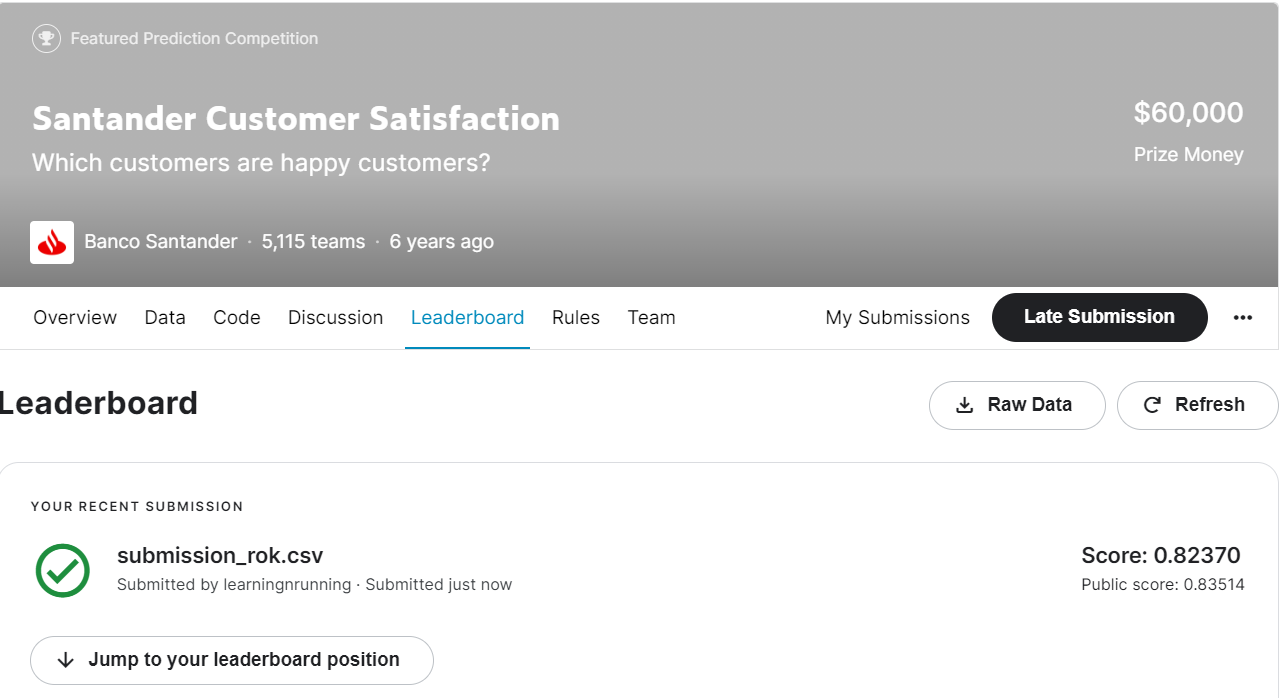

2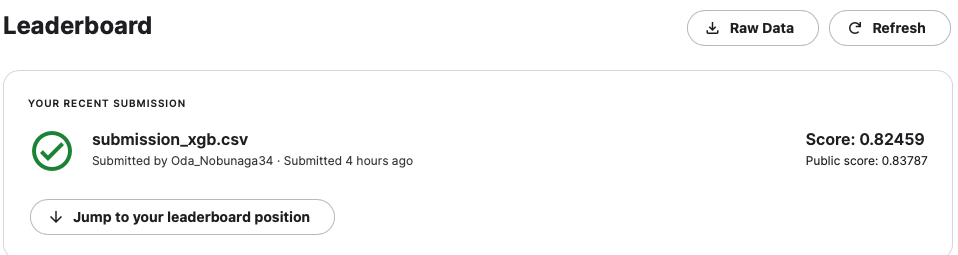

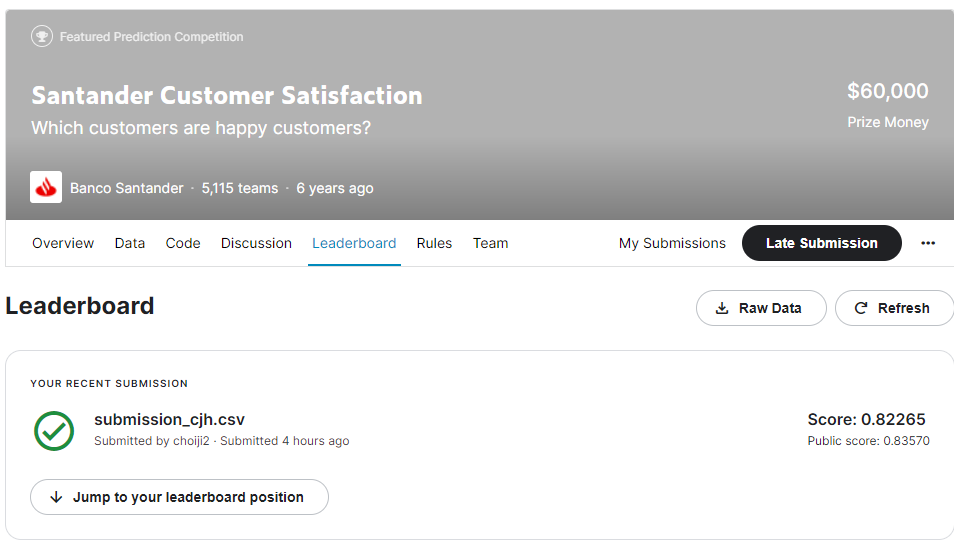

## 캐글 순위

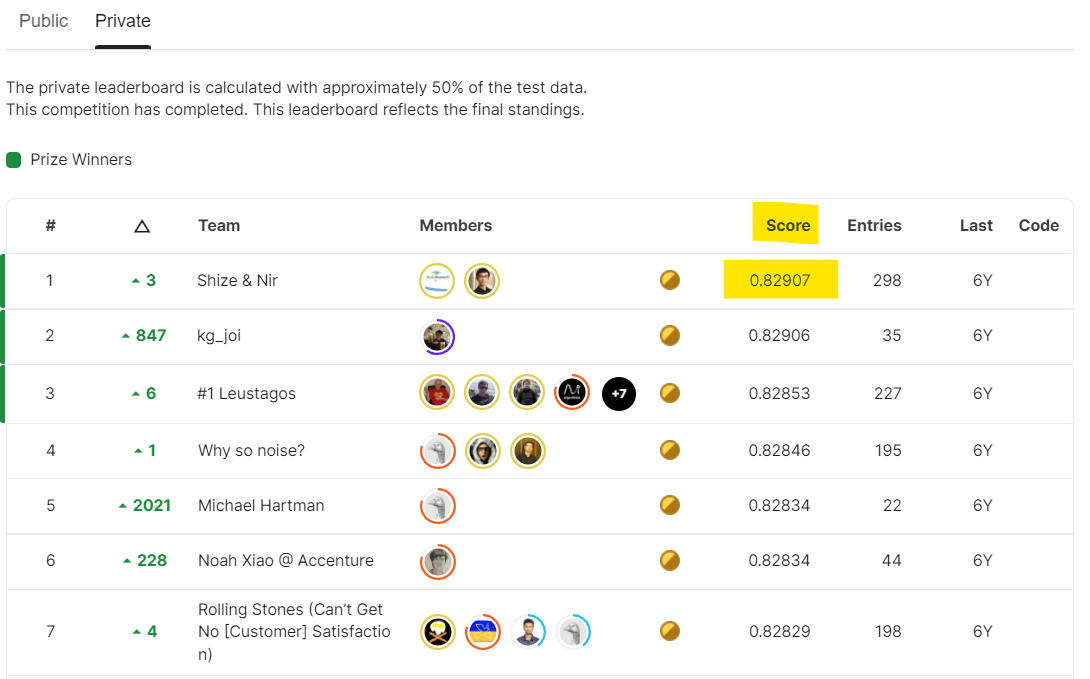